In [1]:
import zipfile
import os
from tqdm.notebook import tqdm
sample = 'SIminiBE'

In [2]:
file = zipfile.ZipFile('Alleles_frequency_table.zip')

In [3]:
file.extractall()

In [4]:
import pandas as pd

In [5]:
with open("Alleles_frequency_table.txt",'r') as f:
    content = f.readlines()

In [6]:
sheet = pd.read_csv("Alleles_frequency_table.txt",sep='\t')

In [7]:
new_sheet = []
for i in content:
    if "UNMO" in i :
        pass
    else:
        new_sheet.append(i)
new_sheet = '\n'.join(new_sheet)
with open('new_sheet.tsv','w') as f:
    f.write(new_sheet)

In [8]:
sheet = pd.read_csv("new_sheet.tsv",sep='\t')

In [9]:
sheet.loc[0]['Aligned_Sequence']

'CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAGAACACAGGTGTCGTGACGCGGTTCCGGTTAAGGTGAACGCGTTATATTAAGGATATTCGAAAAATAATCAACCTCTGGATTACAAAATTTGTGAAAGATTGACTGGTATTCTTAACTATGTTGCTCCTTTTACGCTATGTGGATACGCTGCTTTAATGCCTTTGTATCATGCTATTGCTTCCCGTATGGCTTTCAT'

In [10]:
sheet.loc[0]['Reference_Sequence']

'CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAGAACACAGGTGTCGTGACGCGGTTCCGGTTAAGGTGAACGCGTCACATCAAGGACATTCNNNNNNTAATCAACCTCTGGATTACAAAATTTGTGAAAGATTGACTGGTATTCTTAACTATGTTGCTCCTTTTACGCTATGTGGATACGCTGCTTTAATGCCTTTGTATCATGCTATTGCTTCCCGTATGGCTTTCAT'

In [11]:
import re

In [12]:
a = re.search(r"[A-Z]{6}TAATCAACCT",'NNNNNNTAATCAACCTCTGGATTACAAAAT')

In [13]:
a.group().replace('TAATCAACCT','')

'NNNNNN'

In [14]:
len('NNNNNN')

6

In [15]:
sheet.head(10)

,Aligned_Sequence,Reference_Sequence,Reference_Name,Read_Status,n_deleted,n_inserted,n_mutated,#Reads,%Reads
0,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,667,0.016717
1,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,612,0.015338
2,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,483,0.012105
3,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,429,0.010752
4,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,407,0.010200
5,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,406,0.010175
6,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,375,0.009398
7,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,370,0.009273
8,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,369,0.009248
9,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,4,363,0.009098


In [16]:
result = ''
n = 0
for i in tqdm(sheet.index):
    reads = sheet.loc[i]['#Reads']
    seq = sheet.loc[i]['Aligned_Sequence']
    n_mutated = sheet.loc[i]['n_mutated']
    if n_mutated == 0:
        continue
    if 'GCGTCACATCAAGGACATTC' in seq:
        print('unmodified')
        continue
        
    try:
        pam = re.search(r"[A-Z]{6}TAATCAACCT",seq).group().replace('TAATCAACCT','')
        # pam = pam[:4]
        edit_read = re.search(r'[A-Z]{22}TAATCAACC',seq).group()[:16]
    except Exception as e:
        pass
        continue

    sg = 'cacatcaaggacattc'.upper()
    correct_edit = True
    for base_id in range(len(sg)):
        base_from = sg[base_id] 
        base_to = edit_read[base_id]
        if base_to != base_from:
            #编辑
            if base_from == 'C' and base_to == 'T':
                pass
            else:
                # pams[pam][0] += reads
                correct_edit = False
    if correct_edit:
        for j in range(reads):
            record = f'>seq{n}\n{pam}\n\n' 
            result += record
            n+=1

  0%|          | 0/578158 [00:00<?, ?it/s]

unmodified
unmodified
unmodified
unmodified
unmodified
unmodified
unmodified


In [17]:
a ='123456'
a[0:4]

'1234'

In [18]:
with open('result.fasta','w') as f:
    f.write(result)

In [19]:
result[:100]

'>seq0\nGAAAAA\n\n>seq1\nGAAAAA\n\n>seq2\nGAAAAA\n\n>seq3\nGAAAAA\n\n>seq4\nGAAAAA\n\n>seq5\nGAAAAA\n\n>seq6\nGAAAAA\n\n>s'

In [20]:
!/home/chief/miniconda3/bin/weblogo --format PNG   --resolution 1200 -A dna --annotate 1,2,3,4,5,6  -U probability -c 'basepairing' <result.fasta> result.png 

Usage: weblogo [options]  < sequence_data.fa > sequence_logo.eps

weblogo: error: option -c: invalid choice: 'basepairing' (choose from 'auto', 'monochrome', 'base pairing', 'classic', 'hydrophobicity', 'chemistry', 'charge')


In [21]:
!/home/chief/miniconda3/bin/weblogo --format PNG   --resolution 1200 -A dna --annotate 1,2,3,4,5,6  -U probability -c 'classic' <result.fasta> result.png  --fineprint '' --title DS22-1-7

In [ ]:
# %%html
# <img src="result.png"",width=40,height=20>

In [23]:
!/home/chief/miniconda3/bin/weblogo --format PNG   --resolution 1200 -A dna --annotate 1,2,3,4,5,6  -c 'classic'  --resolution 600   <result.fasta> logo_WT.png --fineprint '' --title '{sample}'

In [24]:
%%html
<img src="logo_WT.png"",width=40,height=20>

In [62]:
sheet = pd.read_csv("Alleles_frequency_table.txt",sep='\t')
result = ''
n = 0
pams = {}
for i in tqdm(sheet.index):
    reads = sheet.loc[i]['#Reads']
    type = sheet.loc[i]['Read_Status']
    seq = sheet.loc[i]['Aligned_Sequence']
    n_mutated = sheet.loc[i]['n_mutated']

    try:
        pam = re.search(r'[A-Z]{6}TAATCAACC',seq).group().replace("TAATCAACC",'')
        # pam = pam[2:4]
        edit_read = re.search(r'[A-Z]{22}TAATCAACC',seq).group()[:16]
    except Exception as e:
        # print(e)
        continue

    

    if pam in pams.keys():
        pass
    else:
        pams[pam] = [0,0] # 0号为未编辑，1号为发生编辑


    if 'UNMO' in type: #统计未发生编辑的
        pams[pam][0] += reads
        continue
    elif n_mutated == 0:
        pams[pam][0] += reads
        continue
    elif 'cacatcaaggacattc'.upper() in seq:
        print('unmodified')
        pams[pam][0] += reads
        continue
    sg = 'cacatcaaggacattc'.upper()
    correct_edit = True
    for base_id in range(len(sg)):
        base_from = sg[base_id] 
        base_to = edit_read[base_id]
        if base_to != base_from:
            #编辑
            if base_from == 'C' and base_to == 'T':
                pass
            else:
                # pams[pam][0] += reads
                correct_edit = False
                # print(f'{sg}\n{edit_read}')

                
                
                break
            
    if correct_edit:
        pams[pam][1] += reads
    else:
        pams[pam][0] += reads


  0%|          | 0/1660245 [00:00<?, ?it/s]

unmodified
unmodified
unmodified
unmodified
unmodified
unmodified
unmodified


In [63]:
pams

{'GGGGGG': [4631, 1794],
 'GAAAAA': [4404, 1988],
 'GGGAGG': [4408, 913],
 'GGCGGG': [4240, 477],
 'AAAAAA': [3880, 1721],
 'GGGTTT': [3601, 273],
 'GGGGGT': [3592, 1332],
 'GACAGG': [3516, 358],
 'GGAGGG': [3520, 1469],
 'GACGGG': [3421, 379],
 'GATGGG': [3351, 568],
 'GATAAG': [3126, 289],
 'GGGTGG': [3326, 309],
 'GAGGGG': [3254, 1441],
 'GAAAAG': [3426, 1527],
 'GGGCGG': [3156, 220],
 'GATTAG': [3002, 159],
 'GGTGGG': [3210, 508],
 'GAAAGG': [3021, 1077],
 'GCGAGG': [2808, 432],
 'GGGTTG': [3008, 275],
 'GCGGGG': [2981, 1092],
 'AACGGG': [2794, 511],
 'GATAAA': [2749, 372],
 'AAAAAG': [2807, 1248],
 'GGGGTG': [2835, 1300],
 'GGATAG': [2676, 180],
 'GATAGG': [2777, 389],
 'GGTAAA': [2604, 202],
 'GGGAGT': [2783, 633],
 'GACAAA': [2801, 586],
 'GGGATT': [2765, 415],
 'GGGGTT': [2947, 1134],
 'GAACGG': [2641, 350],
 'GGAAAA': [2718, 1200],
 'GGGGGA': [2801, 1272],
 'GTTGGG': [2609, 405],
 'GAGTGG': [2624, 574],
 'GCGCGG': [2643, 79],
 'GGGGAG': [2583, 1206],
 'GGGCTG': [2904, 169],
 '

In [64]:
eff = {}
ratio = {}
pam_dist = {}
scale_r = {}
total_edit_reads = 1
total_reads = 0
scale_total_edit = 0
num=0
result = ''
TAM_info = 'TAM,Edited Reads,Unedit Reads,Total Reads,Scaled Edited Reads,Scaled Unedit Reads,All Reads Scaled To\n'
for i in pams.keys():
    e = pams[i][1]/(pams[i][0] + pams[i][1])
    eff[f'NN{i}'] = e*100
    total_edit_reads += pams[i][1]
    total_reads += pams[i][0] + pams[i][1]

    # 老马要求的缩放.其实就是编辑效率
    n = 10000
    edit_n = int(n*e)
    unedit_n = n - edit_n
    # print(edit_n)
    scale_total_edit += edit_n

    for j in range(edit_n):
        record = f'>seq{num}\n{i}\n\n' 
        result += record
        num+=1

with open('scaled_result.fasta','w') as f:
    f.write(result)


--------
# Ranking

In [65]:
sheet = pd.read_csv("Alleles_frequency_table.txt",sep='\t')


In [66]:
sheet

,Aligned_Sequence,Reference_Sequence,Reference_Name,Read_Status,n_deleted,n_inserted,n_mutated,#Reads,%Reads
0,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,2238,0.056090
1,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,2192,0.054937
2,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,2188,0.054836
3,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,2086,0.052280
4,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,1983,0.049699
...,...,...,...,...,...,...,...,...,...
1660240,TGGTAGTCGCCGTGGACGTTCTTTTTCGCAACGGGTTTGCCACCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,MODIFIED,0,0,1,1,0.000025
1660241,TGGTAGTCGCCGTGGACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,1,0.000025
1660242,TGGTAGTCGCCGTGGACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,1,0.000025
1660243,TGGTAGTTGCCGTAAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,CAGTAGTCGCCGTGAACGTTCTTTTTCGCAACGGGTTTGCCGCCAG...,Reference,UNMODIFIED,0,0,0,1,0.000025


In [67]:
result = ''
n = 0
pams = {}
for i in tqdm(sheet.index):
    reads = sheet.loc[i]['#Reads']
    type = sheet.loc[i]['Read_Status']
    seq = sheet.loc[i]['Aligned_Sequence']
    n_mutated = sheet.loc[i]['n_mutated']

    try:
        pam = re.search(r'[A-Z]{6}TAATCAACC',seq).group().replace("TAATCAACC",'')
        pam = pam[2:4]
        edit_read = re.search(r'[A-Z]{22}TAATCAACC',seq).group()[:16]
    except Exception as e:
        # print(e)
        continue

    

    if pam in pams.keys():
        pass
    else:
        pams[pam] = [0,0] # 0号为未编辑，1号为发生编辑


    if 'UNMO' in type: #统计未发生编辑的
        pams[pam][0] += reads
        continue
    elif n_mutated == 0:
        pams[pam][0] += reads
        continue
    elif 'cacatcaaggacattc'.upper() in seq:
        print('unmodified')
        pams[pam][0] += reads
        continue
    sg = 'cacatcaaggacattc'.upper()
    correct_edit = True
    for base_id in range(len(sg)):
        base_from = sg[base_id] 
        base_to = edit_read[base_id]
        if base_to != base_from:
            #编辑
            if base_from == 'C' and base_to == 'T':
                pass
            else:
                # pams[pam][0] += reads
                correct_edit = False
                # print(f'{sg}\n{edit_read}')

                
                
                break
            
    if correct_edit:
        pams[pam][1] += reads
    else:
        pams[pam][0] += reads

    
    # try:
        # pam = re.search(r"[A-Z]{6}TAATCAACCT",seq).group().replace('TAATCAACCT','')
    # except Exception as e:
        # pass
        # continue
    # for j in range(reads):
        # record = f'>seq{n}\n{pam}\n\n' 
        # result += record
        # n+=1

  0%|          | 0/1660245 [00:00<?, ?it/s]

unmodified
unmodified
unmodified
unmodified
unmodified
unmodified
unmodified


In [68]:
eff = {}
ratio = {}
pam_dist = {}
scale_r = {}
total_edit_reads = 1
total_reads = 0
scale_total_edit = 0
TAM_info = 'TAM,Edited Reads,Unedit Reads,Total Reads,Scaled Edited Reads,Scaled Unedit Reads,All Reads Scaled To\n'
for i in pams.keys():
    e = pams[i][1]/(pams[i][0] + pams[i][1])
    eff[f'NN{i}'] = e*100
    total_edit_reads += pams[i][1]
    total_reads += pams[i][0] + pams[i][1]

    # 老马要求的缩放
    n = 10000
    edit_n = int(n*e)
    unedit_n = n - edit_n
    print(edit_n)
    scale_total_edit += edit_n

for i in pams.keys():
    e = pams[i][1]/(pams[i][0] + pams[i][1])
    edit_n = int(n*e)
    print(edit_n)
    scale_r[f'NN{i}'] = edit_n/scale_total_edit
    TAM_info += (f'NN{i},{pams[i][1]},{pams[i][0]},{pams[i][0] + pams[i][1]},{edit_n},{unedit_n},{n}\n')
    

for i in pams.keys():
    r = pams[i][1]/total_edit_reads
    ratio[f'NN{i}'] = r
    d = (pams[i][1] + pams[i][0])/total_reads
    pam_dist[f'NN{i}'] = d

with open(f'TAM_info_of{sample}.csv','w') as f:
    f.write(TAM_info)

scale_total_edit

3022
2686
2443
1262
1418
859
3005
1961
858
1096
430
1080
1125
433
421
400
3022
2686
2443
1262
1418
859
3005
1961
858
1096
430
1080
1125
433
421
400


22499

In [73]:
import matplotlib.pyplot as plt

# 给定的数据字典
# eff = {'A': 0.5, 'B': 1.2, 'C': 0.3}

# 将字典项按值从大到小排序
sorted_eff = sorted(eff.items(), key=lambda x: x[1], reverse=True)

others sum = 0.40430564641490624


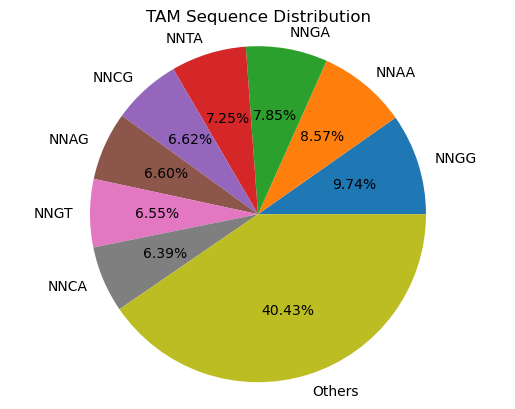

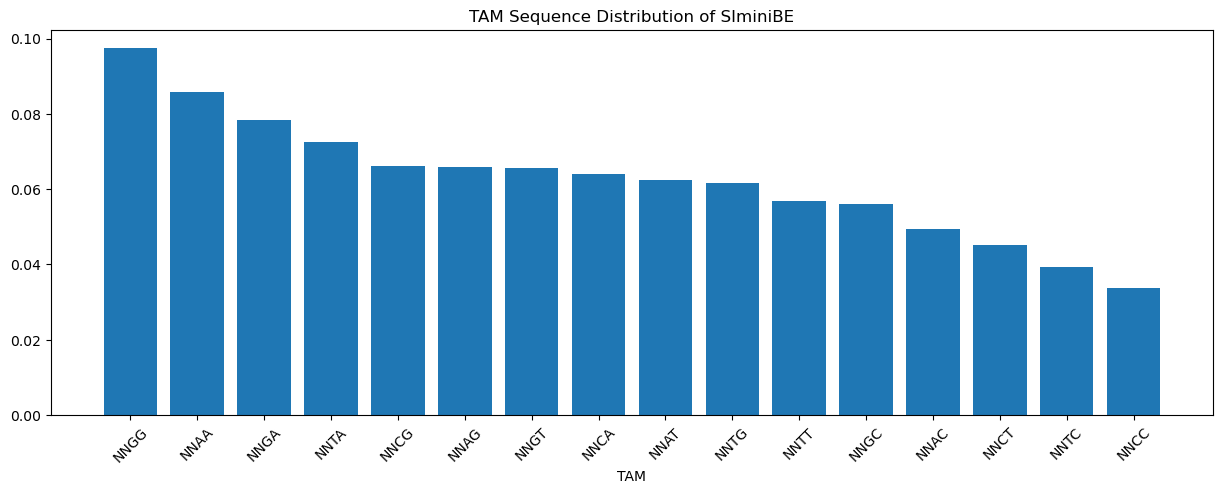

In [74]:
# import matplotlib.pyplot as plt

# 给定的数据字典
# eff = {'A': 0.5, 'B': 1.2, 'C': 0.3, 'D': 0.8, 'E': 0.9, 'F': 0.7, 'G': 0.6, 'H': 1.5, 'I': 1.1, 'J': 0.4}

# 将字典项按值从大到小排序
sorted_ratio = sorted(pam_dist.items(), key=lambda x: x[1], reverse=True)

# 提取前四项和计算其他项的总和
top_6 =sorted_ratio[:8]
others_sum = sum(val for _, val in sorted_ratio[8:])
print(f'others sum = {others_sum}')
# 创建新的字典，包含前四项和 "Others" 项
new_ratio = dict(top_6)
new_ratio['Others'] = others_sum

# 获取标签和值
labels = list(new_ratio.keys())
values = list(new_ratio.values())

# 创建饼图
plt.pie(values, labels=labels, autopct='%1.2f%%')

# 添加标题
plt.title('TAM Sequence Distribution')

# 显示饼图
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
# plt.savefig('Pie:Ratio_of_WT_Edited_Reads.png',dpi=600)
# 分离排序后的键和值
labels, values = zip(*sorted_ratio)

# 创建柱状图
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(labels, values)

# 添加标题和标签
ax.set_title(f'TAM Sequence Distribution of {sample}')
ax.set_xlabel('TAM')
ax.set_ylabel('')
plt.xticks(rotation=45)
# 显示柱状图
plt.show()

content = 'TAM,Ratio\n'
for i in sorted_ratio:
    content += f'{i[0]},{i[1]}\n'

with open(f'TAM_Library_Distribution_of_{sample}.csv','w') as f:
    f.write(content)

In [75]:
r = (str(sorted_ratio).replace('[','').replace(']','').replace('(','').replace('),','\n').replace(' ','').replace(')',''))

with open(f'Scaled Ratio of {sample}.csv','w') as f:
    r = 'TAM,Scaled Ratio\n' + r
    f.write(r)

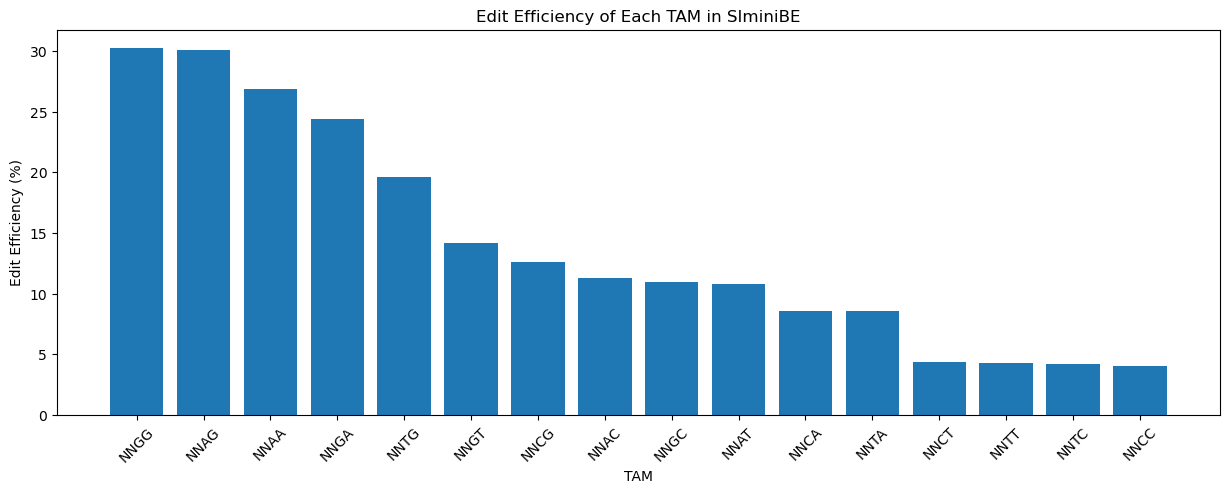

In [76]:
# 分离排序后的键和值
labels, values = zip(*sorted_eff)

# 创建柱状图
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(labels, values)

# 添加标题和标签
ax.set_title(f'Edit Efficiency of Each TAM in {sample}')
ax.set_xlabel('TAM')
ax.set_ylabel('Edit Efficiency (%)')
plt.xticks(rotation=45)
# 显示柱状图
# plt.show()
plt.savefig(f'Edit Eff of {sample}')

others sum = 0.19420558209172759


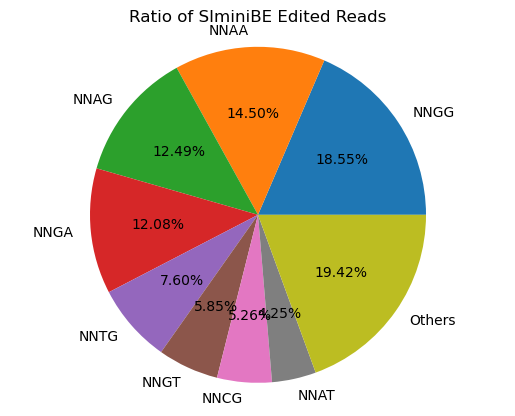

In [77]:
# import matplotlib.pyplot as plt

# 给定的数据字典
# eff = {'A': 0.5, 'B': 1.2, 'C': 0.3, 'D': 0.8, 'E': 0.9, 'F': 0.7, 'G': 0.6, 'H': 1.5, 'I': 1.1, 'J': 0.4}

# 将字典项按值从大到小排序
sorted_ratio = sorted(ratio.items(), key=lambda x: x[1], reverse=True)

# 提取前四项和计算其他项的总和
top_6 = sorted_ratio[:8]
others_sum = sum(val for _, val in sorted_ratio[8:])
print(f'others sum = {others_sum}')
# 创建新的字典，包含前四项和 "Others" 项
new_ratio = dict(top_6)
new_ratio['Others'] = others_sum

# 获取标签和值
labels = list(new_ratio.keys())
values = list(new_ratio.values())

# 创建饼图
plt.pie(values, labels=labels, autopct='%1.2f%%')

# 添加标题
plt.title(f'Ratio of {sample} Edited Reads')

# 显示饼图
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()
plt.savefig(f'Pie:Ratio_of_{sample}_Edited_Reads.png',dpi=600)

In [78]:
content = 'TAM,Ratio\n'
for i in sorted_ratio:
    content += f'{i[0]},{i[1]}\n'

with open(f'Ranking_of_{sample}.csv','w') as f:
    f.write(content)

In [79]:
i

('NNCC', 0.008473172703001715)

In [80]:
top_6

[('NNGG', 0.18545747845270194),
 ('NNAA', 0.14500122559573891),
 ('NNAG', 0.12493457968690998),
 ('NNGA', 0.12079074112105573),
 ('NNTG', 0.07600846654786117),
 ('NNGT', 0.058540414847595514),
 ('NNCG', 0.05259793172438008),
 ('NNAT', 0.04246192372157115)]

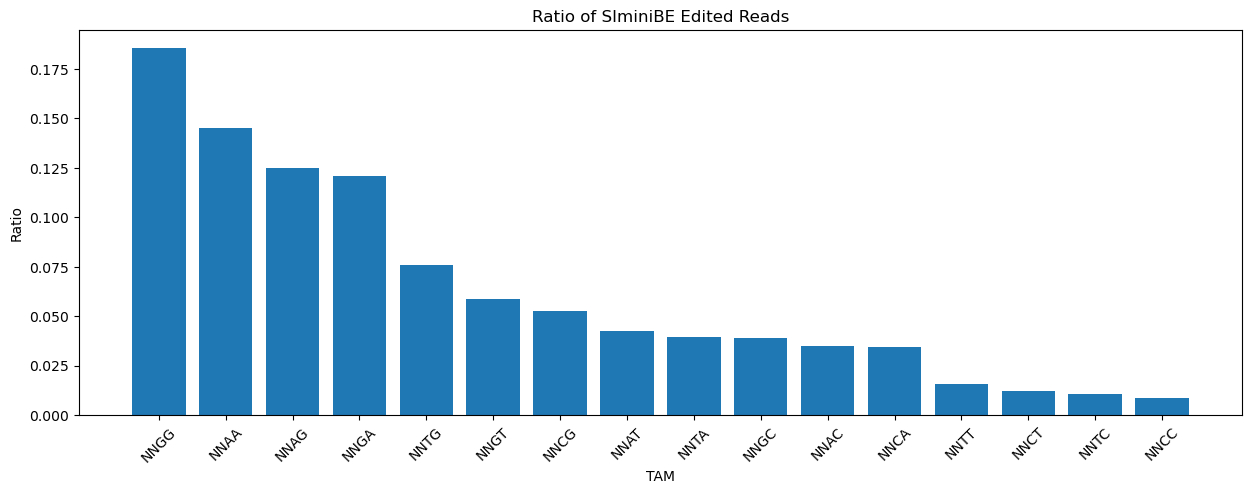

In [81]:
# 分离排序后的键和值
labels, values = zip(*sorted_ratio)

# 创建柱状图
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(labels, values)

# 添加标题和标签
ax.set_title(f'Ratio of {sample} Edited Reads')
ax.set_xlabel('TAM')
ax.set_ylabel('Ratio')
plt.xticks(rotation=45)
# 显示柱状图
# plt.show()
plt.savefig(f'Bar:Ratio_of_{sample}_Edited_Reads',dpi=600)

In [82]:
a=[]
for i in pams.keys():
    n = pams[i][0] + pams[i][1]
    a.append(n)

/home/chief/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(22.694444444444443, 0.5, 'Counts of TAM')

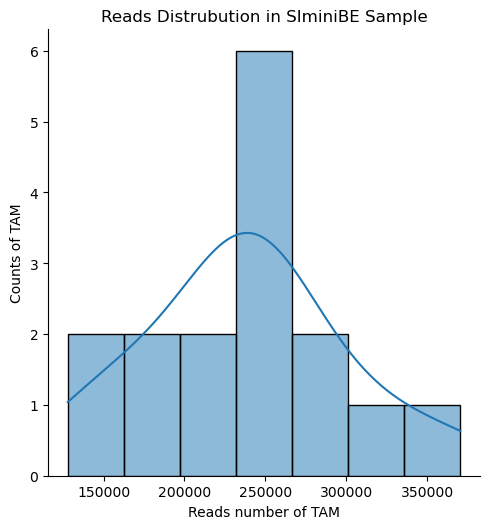

In [83]:
import seaborn as sns
sns.displot(a,kde=True)
plt.title(f'Reads Distrubution in {sample} Sample')
plt.xlabel('Reads number of TAM')
plt.ylabel('Counts of TAM')

others sum = 0


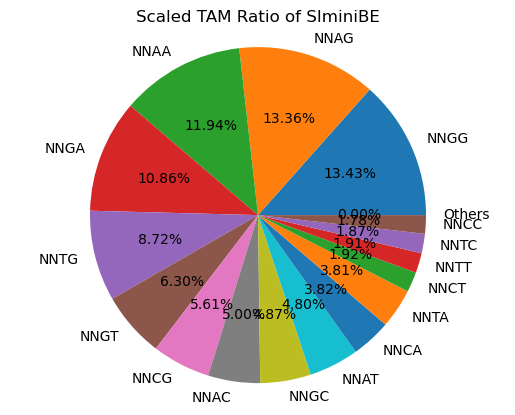

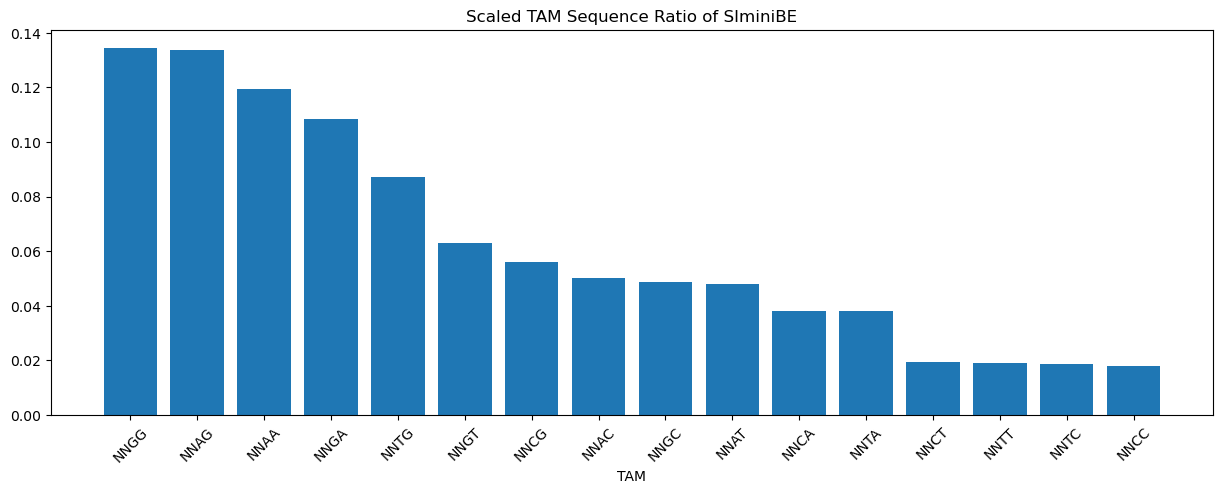

In [84]:
# import matplotlib.pyplot as plt

# 给定的数据字典
# eff = {'A': 0.5, 'B': 1.2, 'C': 0.3, 'D': 0.8, 'E': 0.9, 'F': 0.7, 'G': 0.6, 'H': 1.5, 'I': 1.1, 'J': 0.4}

# 将字典项按值从大到小排序
sorted_ratio = sorted(scale_r.items(), key=lambda x: x[1], reverse=True)

# 提取前四项和计算其他项的总和
top_6 =sorted_ratio[:16]
others_sum = sum(val for _, val in sorted_ratio[0:0])
print(f'others sum = {others_sum}')
# 创建新的字典，包含前四项和 "Others" 项
new_ratio = dict(top_6)
new_ratio['Others'] = others_sum

# 获取标签和值
labels = list(new_ratio.keys())
values = list(new_ratio.values())

# 创建饼图
plt.pie(values, labels=labels, autopct='%1.2f%%')

# 添加标题
plt.title(f'Scaled TAM Ratio of {sample}')

# 显示饼图
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()
plt.savefig(f'Pie:Scaled_Ratio_of_{sample}_Edited_Reads.png',dpi=600)
# 分离排序后的键和值
labels, values = zip(*sorted_ratio)

# 创建柱状图
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(labels, values)

# 添加标题和标签
ax.set_title(f'Scaled TAM Sequence Ratio of {sample}')
ax.set_xlabel('TAM')
ax.set_ylabel('')
plt.xticks(rotation=45)
# 显示柱状图
plt.savefig(f'Bar:Scaled TAM Sequence Ratio in {sample}.png',dpi=600)

content = 'TAM,Ratio\n'
for i in sorted_ratio:
    content += f'{i[0]},{i[1]}\n'

with open(f'Scaled_Edited_TAM_Ratio_of_{sample}.csv','w') as f:
    f.write(content)

In [85]:
sorted_ratio

[('NNGG', 0.13431708075914486),
 ('NNAG', 0.13356149162184985),
 ('NNAA', 0.11938308369260855),
 ('NNGA', 0.10858260367127427),
 ('NNTG', 0.08715942930796924),
 ('NNGT', 0.06302502333437042),
 ('NNCG', 0.05609138183919285),
 ('NNAC', 0.050002222320992044),
 ('NNGC', 0.04871327614560647),
 ('NNAT', 0.04800213342815236),
 ('NNCA', 0.03817947464331748),
 ('NNTA', 0.0381350282234766),
 ('NNCT', 0.019245299791101827),
 ('NNTT', 0.01911196053157918),
 ('NNTC', 0.018711942753011246),
 ('NNCC', 0.017778567936352727)]

In [86]:
b={}
for i in pams.keys():
    n = pams[i][0] + pams[i][1]
    b[i] = n

In [87]:
for i in b.keys():
    print(f'N{i}\t {( b[i]/sum(a)*100)}%')

NGG	 9.742027223448094%
NAA	 8.56756640211696%
NGA	 7.848275869322401%
NCG	 6.6151537971262035%
NGT	 6.553784294876515%
NCA	 6.393944875778031%
NAG	 6.599114638440552%
NTG	 6.151385467786008%
NTA	 7.249568257400625%
NGC	 5.608893792372302%
NTT	 5.691508606454788%
NAT	 6.236287834008906%
NAC	 4.929438219264239%
NCT	 4.506977296965286%
NTC	 3.9436610089629975%
NCC	 3.362412415676095%


In [88]:
1/16*100

6.25